In [1]:
%load_ext autoreload

In [2]:
# import classy module
%autoreload 2
from classy import Class

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# create instance of the class "Class"
from classy import Class

LambdaCDM = Class()

LambdaCDM.set({
    'recombination': 'hyrec',
    'Alpha_inf hyrec file': '../hyrec/Alpha_inf.dat',
    'output':'tCl,pCl,lCl,mPk',
    'lensing':'yes','P_k_max_1/Mpc':3.0
})

LambdaCDM.compute()

hyrec_mod = Class()
# pass input parameters

hyrec_mod.set({
    'recombination': 'hyrec',
    'Alpha_inf hyrec file': '../hyrec/Alpha_BB_n_250_fine.dat',
    'output':'tCl,pCl,lCl,mPk',
    'lensing':'yes','P_k_max_1/Mpc':3.0
})


# run class

hyrec_mod.compute()

did it set correctly???????
b'../hyrec/Alpha_inf.dat'
did it set correctly???????
b'../hyrec/Alpha_BB_n_250_fine.dat'


/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, '$(C_\\ell - C_\\ell^\\mathrm{ref})/C_\\ell^\\mathrm{ref} [\\%]$')

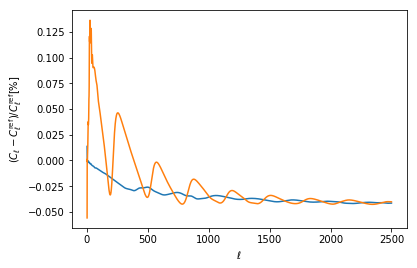

In [7]:
cls_new = hyrec_mod.lensed_cl(2500)
cls_std = LambdaCDM.lensed_cl(2500)

ll_vec_new = cls_new['ell']
ll_vec_std = cls_std['ell']

plt.figure()

ax = plt.gca()

# ax.set_yscale('log')

plt.plot(ll_vec_new, (cls_new['tt']/cls_std['tt'] - 1.)*100)
plt.plot(ll_vec_new, (cls_new['ee']/cls_std['ee'] - 1.)*100)


plt.xlabel(r'$\ell$')
plt.ylabel(r'$(C_\ell - C_\ell^\mathrm{ref})/C_\ell^\mathrm{ref} [\%]$')

In [ ]:
np.max(np.abs(
    (hyrec_mod.get_thermodynamics()['x_e'] - LambdaCDM.get_thermodynamics()['x_e'])
    /LambdaCDM.get_thermodynamics()['x_e']
))


In [ ]:
%autoreload
# LambdaCDM_hyrec = Class()
# LambdaCDM_hyrec.set({'recombination': 'hyrec', 'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
LambdaCDM_newAlpha = Class()
LambdaCDM_newAlpha.set({
    'recombination': 'hyrec', 
    'hyrec_Alpha_inf_file': './hyrec/Alpha_inf.dat',
    'output':'tCl,pCl,lCl,mPk',
    'lensing':'yes',
    'P_k_max_1/Mpc':3.0
})
# LambdaCDM_hyrec.compute()
LambdaCDM_newAlpha.compute()

In [ ]:
cls_hyrec=LambdaCDM_hyrec.lensed_cl(2500)
cls_newAlpha = LambdaCDM_newAlpha.lensed_cl(2500)

ll_vec_hyrec = cls_hyrec['ell']

plt.figure()

ax = plt.gca()

# ax.set_yscale('log')

plt.plot(ll_vec_hyrec, (cls_newAlpha['tt']/cls_hyrec['tt'] - 1.)*100)
plt.plot(ll_vec_hyrec, (cls_newAlpha['ee']/cls_hyrec['ee'] - 1.)*100)

In [ ]:
a = np.loadtxt('../hyrec/Alpha_inf.dat')
a = a/1e5
np.savetxt('../hyrec/Alpha_inf.dat', a)